## Problem Statement: 
### Despite stable sales, the company aims to increase profitability.

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

from datetime import datetime, date

**Importing Dataset**

In [2]:
df = pd.read_excel(r"F:\Data Analytics\2.RFM Analysis project\11.RFM_Final_Dataset.xlsx")
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,True,10.0,69.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,True,10.0,45.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,Affluent Customer,N,True,22.0,47.0,586 Miller Parkway,2835.0,NSW,Australia,1.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,Mass Customer,N,True,16.0,62.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,Affluent Customer,N,True,2.0,27.0,0601 Stephen Place,2292.0,NSW,Australia,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,...,Mass Customer,N,True,7.0,29.0,3 Hayes Court,3109.0,VIC,Australia,10.0
19799,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,...,Mass Customer,N,True,19.0,49.0,0 Pearson Crossing,4405.0,QLD,Australia,1.0
19800,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,...,High Net Worth,N,True,14.0,50.0,10055 Old Shore Lane,3630.0,VIC,Australia,1.0
19801,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,...,Mass Customer,N,True,20.0,69.0,1 Wayridge Park,4301.0,QLD,Australia,1.0


In [3]:
#Creating_Age_Groups for help in analysis 
df['age_group'] = pd.cut(df['Age'], bins=range(20, 101, 10), right=False, labels=range(20, 91, 10))

In [4]:
#Define the custom order for the segments to override the default pandas alphabetical sorting, which making output less meaningful.
segments_order = pd.CategoricalDtype(categories=['Platinum_customer', 'Gold_customer', 'Silver_customer', 'Bronze_customer'], ordered=True)
df['customer_segments'] = df['customer_segments'].astype(segments_order)

## **DATA ANALYSIS**

### 1) **Sales Overview**

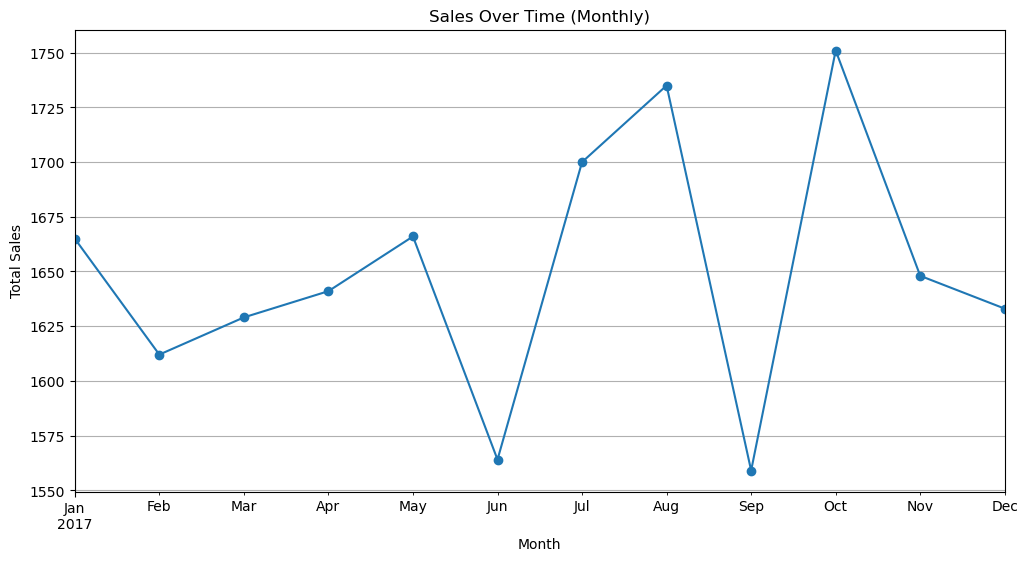

In [5]:
# monthly sales 
resampled_data = df.groupby('transaction_date')['transaction_id'].count().resample('M')  # Monthly

total_sales_per_month = resampled_data.sum()
plt.figure(figsize=(12, 6))
total_sales_per_month.plot(marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Over Time (Monthly)')
plt.grid(True)
plt.show()

**Observation: Sales appear to be steady over time, indicating a stable customer base but potential for growth.**

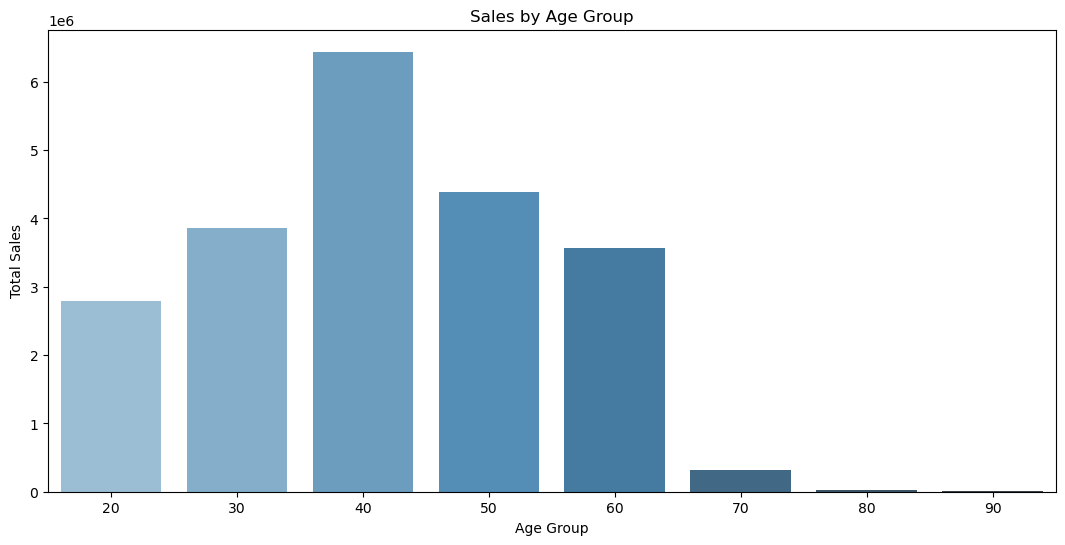

In [6]:
# Grouping sales by age group
age_group_sales = df.groupby('age_group',observed = False)['list_price'].sum().reset_index()

plt.figure(figsize=(13, 6))
sns.barplot(x='age_group', y='list_price', data=age_group_sales, palette="Blues_d")
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()

**Customers in their 40s and 50s are the leading contributors to sales, followed closely by those in their 30s and 60s**

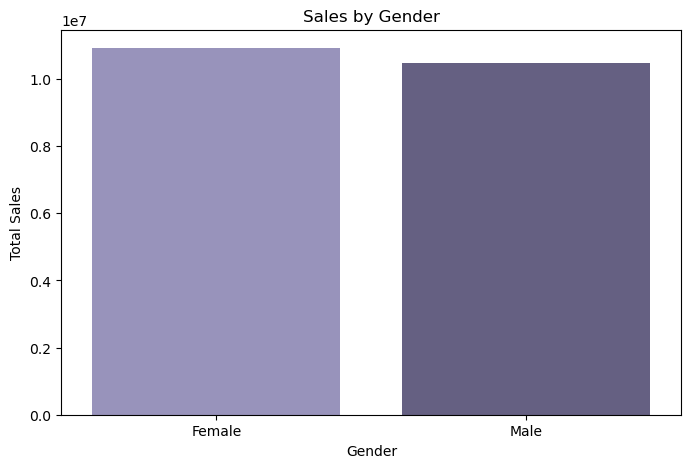

In [7]:
# Grouping sales by gender
gender_sales = df.groupby('gender')['list_price'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='list_price', data=gender_sales, palette="Purples_d")
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


**With a close gap between both genders, females generate slightly more sales than males. However, this difference is not significant, suggesting that a gender-neutral approach is appropriate**

### 2. **Customer Segmentation Analysis**

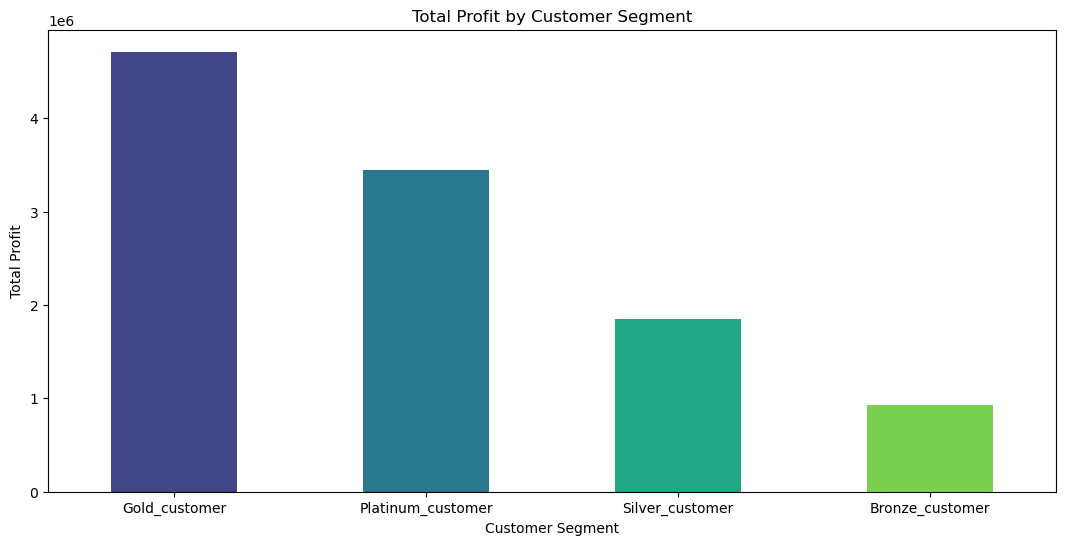

In [8]:
#total profit by each segment 
segment_profit = df.groupby('customer_segments', observed=False)['Profit'].sum().sort_values(ascending=False)
colors = sns.color_palette('viridis', n_colors=len(segment_profit))
plt.figure(figsize=(13, 6))
segment_profit.plot(kind='bar', color=colors)
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.show()

**Gold segment generates the most profit, followed by Platinum. which also states out high level customers to focus on**  
**There's a high potential for increasing profits from Gold customers, which may be easier than from Platinum customers.**

#### **Customer Segment Analysis (Platinum vs Gold)**

By understanding the distinct characteristics of Platinum and Gold segment customers, we can implement targeted marketing approaches for each group

In [9]:
# Filter for platinum customers
platinum_customers = df[df['customer_segments'] == "Platinum_customer"]
# Calculate percentages for each attribute within platinum customers
onlineorder_percentage_P=(platinum_customers['online_order'].value_counts(normalize=True) * 100).round(2)
product_size_percentage_P =(platinum_customers['product_size'].value_counts(normalize=True) * 100).round(2)
state_percentage_p =(platinum_customers['state'].value_counts(normalize=True) * 100).round(2)
gender_percentage_P =(platinum_customers['gender'].value_counts(normalize=True) * 100).round(2)
job_industry_category_percentages_P =(platinum_customers['job_industry_category'].value_counts(normalize=True) * 100).round(2).head(5)
wealth_segment_percentages_P =(platinum_customers['wealth_segment'].value_counts(normalize=True) * 100).round(2)


# Filter for Gold customers
Gold_customers = df[df['customer_segments'] == "Gold_customer"]
# Calculate percentages for each attribute within Gold customers
onlineorder_percentage_G= (Gold_customers['online_order'].value_counts(normalize=True) * 100).round(2)
product_size_percentage_G =(Gold_customers['product_size'].value_counts(normalize=True) * 100).round(2)
state_percentage_G =(Gold_customers['state'].value_counts(normalize=True) * 100).round(2)
gender_percentage_G = (Gold_customers['gender'].value_counts(normalize=True) * 100).round(2)
job_industry_category_percentages_G = (Gold_customers['job_industry_category'].value_counts(normalize=True) * 100).round(2).head(5)
wealth_segment_percentages_G = (Gold_customers['wealth_segment'].value_counts(normalize=True) * 100).round(2)

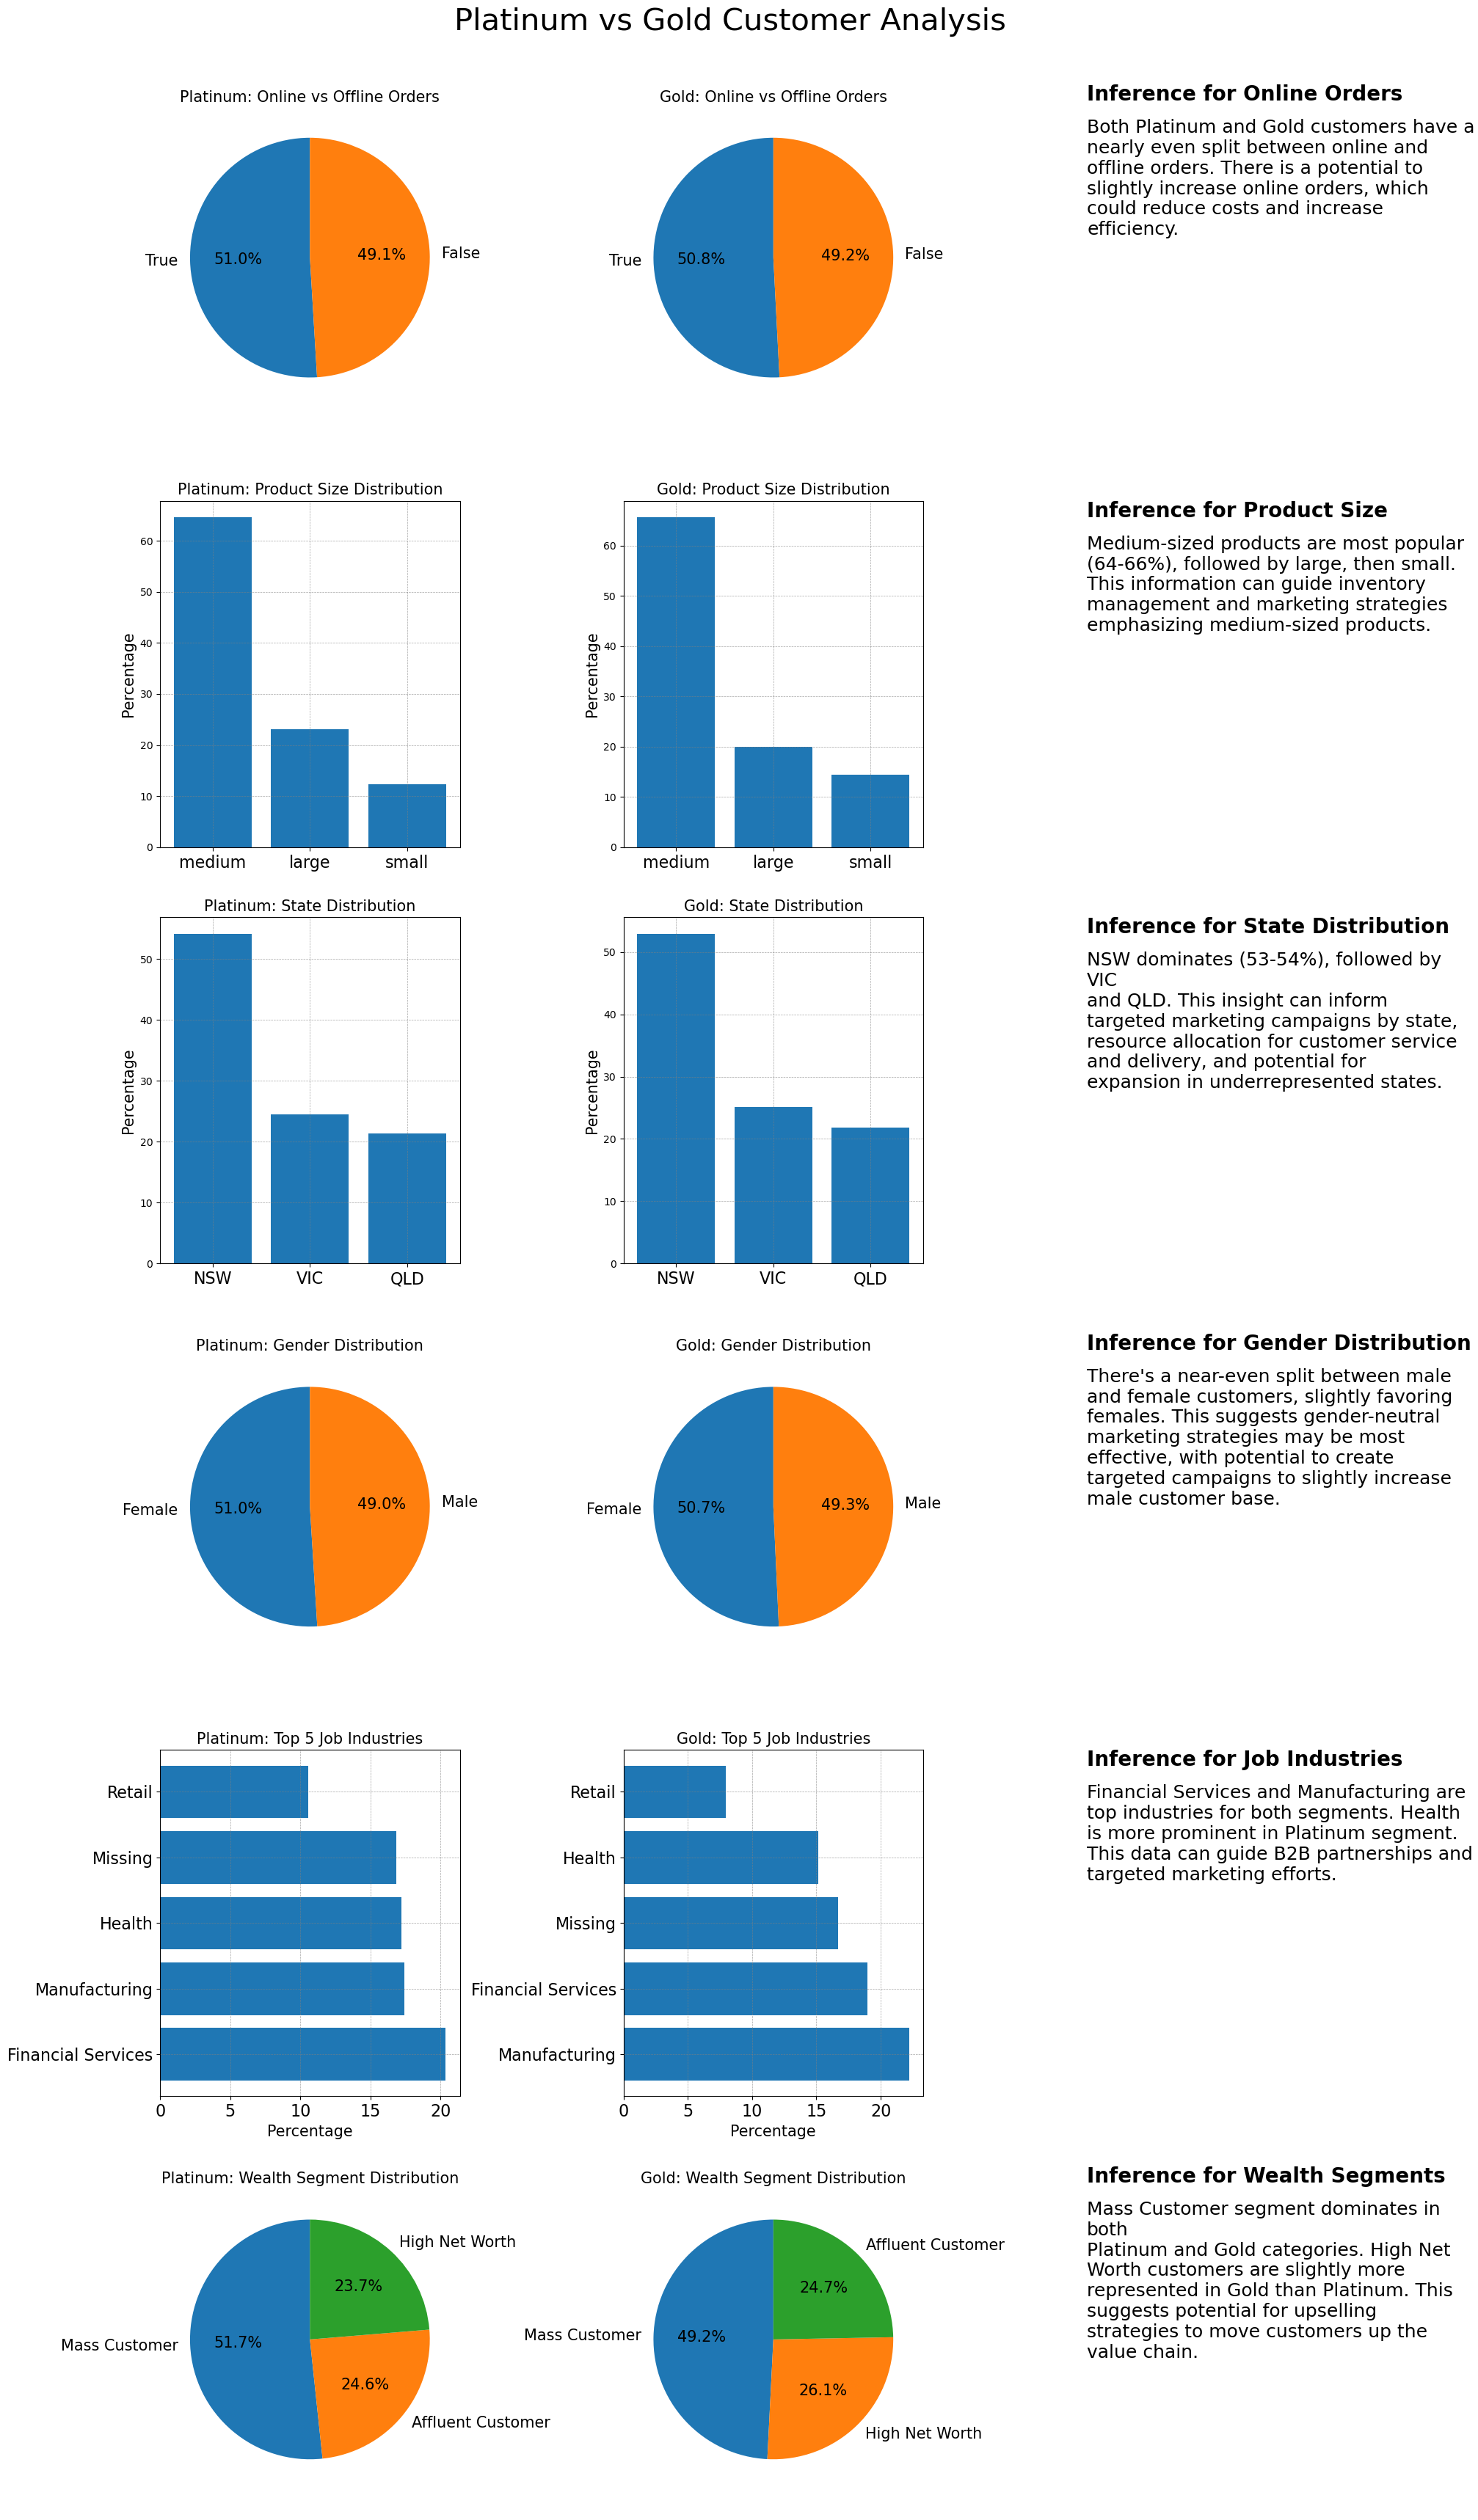

In [10]:
#used AI in text part of this code

from textwrap import wrap
# Set up the subplot layout
fig, axs = plt.subplots(6, 3, figsize=(20, 35))
for ax in axs.flat:
    ax.grid(True, alpha=0.7, linestyle='--', linewidth=0.5, color='grey')
fig.suptitle('Platinum vs Gold Customer Analysis', fontsize=30)

# Function to create pie chart
def create_pie(ax, data, title):
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})
    ax.set_title(title,fontsize=15)

# Function to create bar chart
def create_bar(ax, data, title, horizontal=False):
    if horizontal:
        ax.barh(data.index, data.values)
        ax.set_xlabel('Percentage', fontsize=15)
        ax.tick_params(axis='y', rotation=0, labelsize=16)
    else:
        ax.bar(data.index, data.values)
        ax.set_ylabel('Percentage',fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.tick_params(axis='x', rotation=0, labelsize=16)

# 1. Online Order Percentage
create_pie(axs[0, 0], onlineorder_percentage_P, 'Platinum: Online vs Offline Orders')
create_pie(axs[0, 1], onlineorder_percentage_G, 'Gold: Online vs Offline Orders')
# 2. Product Size
create_bar(axs[1, 0], product_size_percentage_P, 'Platinum: Product Size Distribution')
create_bar(axs[1, 1], product_size_percentage_G, 'Gold: Product Size Distribution')
# 3. State Distribution
create_bar(axs[2, 0], state_percentage_p, 'Platinum: State Distribution')
create_bar(axs[2, 1], state_percentage_G, 'Gold: State Distribution')
# 4. Gender Distribution
create_pie(axs[3, 0], gender_percentage_P, 'Platinum: Gender Distribution')
create_pie(axs[3, 1], gender_percentage_G, 'Gold: Gender Distribution')
# 5. Job Industry Category
create_bar(axs[4, 0], job_industry_category_percentages_P, 'Platinum: Top 5 Job Industries', horizontal=True)
create_bar(axs[4, 1], job_industry_category_percentages_G, 'Gold: Top 5 Job Industries', horizontal=True)
# 6. Wealth Segment
create_pie(axs[5, 0], wealth_segment_percentages_P, 'Platinum: Wealth Segment Distribution')
create_pie(axs[5, 1], wealth_segment_percentages_G, 'Gold: Wealth Segment Distribution')

# Remove axes from the third column for writing inferences
#for i in range(6):
 #   axs[i, 2].axis('off')
    
def add_wrapped_text(ax, text, title, fontsize=18):
    ax.clear()  # Clear the axis
    ax.axis('off')  # Remove the axis
    ax.text(0, 1, title, fontsize=fontsize+2, fontweight='bold', va='top')
    wrapped_text = '\n'.join(wrap(text, width=40))  # Wrap text to 40 characters per line
    ax.text(0, 0.9, wrapped_text, fontsize=fontsize, va='top', ha='left', wrap=True)

# Add text to the third column for inferences
inferences = [
    "Both Platinum and Gold customers have a nearly even split between online and offline orders. There is a potential to slightly increase online orders, which could reduce costs and increase efficiency.",
    "Medium-sized products are most popular (64-66%), followed by large, then small. This information can guide inventory management and marketing strategies emphasizing medium-sized products.",
    "NSW dominates (53-54%), followed by VIC and QLD. This insight can inform targeted marketing campaigns by state, resource allocation for customer service and delivery, and potential for expansion in underrepresented states.",
    "There's a near-even split between male and female customers, slightly favoring females. This suggests gender-neutral marketing strategies may be most effective, with potential to create targeted campaigns to slightly increase male customer base.",
    "Financial Services and Manufacturing are top industries for both segments. Health is more prominent in Platinum segment. This data can guide B2B partnerships and targeted marketing efforts.",
    "Mass Customer segment dominates in both Platinum and Gold categories. High Net Worth customers are slightly more represented in Gold than Platinum. This suggests potential for upselling strategies to move customers up the value chain."
]

titles = [
    "Inference for Online Orders",
    "Inference for Product Size",
    "Inference for State Distribution",
    "Inference for Gender Distribution",
    "Inference for Job Industries",
    "Inference for Wealth Segments"
]

for i, (inference, title) in enumerate(zip(inferences, titles)):
    add_wrapped_text(axs[i, 2], inference, title)

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### **Popular brand by customer segments ⬇**

In [11]:
#understanding brand preference by transactions done by customers 
brand_preference1 = df.groupby(['customer_segments', 'brand'], observed =False)['transaction_id'].count().unstack().fillna(0)
brand_preference_percentage1 = brand_preference1.div(brand_preference1.sum(axis=1), axis=0) * 100
brand_preference_rank1 = brand_preference_percentage1.rank(axis=1, method='min', ascending=False).astype(int)
brand_preference_rank1

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
customer_segments,,,,,,
Platinum_customer,3,6,5,1,4,2
Gold_customer,3,6,4,1,5,2
Silver_customer,2,3,4,1,6,5
Bronze_customer,2,5,6,1,4,3


**High-value customers(Platinum and Gold) prefer Solex, WeareA2B, and Giant bicycle brands which indicates to focus marketing efforts for these brand** 

In [12]:
#understanding brand preference by profit generated by each segment
brand_preference2 = df.groupby(['customer_segments', 'brand'],observed = False)['Profit'].sum().unstack().fillna(0)
brand_preference_percentage2 = brand_preference2.div(brand_preference2.sum(axis=1), axis=0) * 100
brand_preference_rank2 = brand_preference_percentage2.rank(axis=1, method='min', ascending=False).astype(int)
brand_preference_rank2

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
customer_segments,,,,,,
Platinum_customer,5,6,4,2,3,1
Gold_customer,4,6,5,2,3,1
Silver_customer,3,6,5,2,4,1
Bronze_customer,3,6,5,2,4,1


**WeareA2B generates the most profit, despite Solex being the most popular choice.**

we can answer this by looking at the profit margins of each brands⬇

In [13]:
# brand profitability (Profit Margin)

df['profit_margin'] = df['Profit'] / df['list_price'] * 100
brand_performance = df.groupby('brand')[['profit_margin', 'Profit']].mean().sort_values('profit_margin', ascending=False)
brand_performance

,profit_margin,Profit
brand,,
WeareA2B,60.498731,835.780021
Solex,47.911290,567.564450
Trek Bicycles,45.370559,614.707090
OHM Cycles,45.216211,487.360776
Giant Bicycles,35.776556,475.193351
Norco Bicycles,30.408944,298.173117


**higher profit margins leads to increased profit that tells us WeareA2B is a valuable and 2 popular brand** 

### 3. **Product Analysis**

In [14]:
#understanding product line preference by profit generated by each segment
Prod_line_preference = df.groupby(['customer_segments','product_line'],observed = False)['Profit'].sum().unstack().fillna(0)
Prod_line_preference_percentage = Prod_line_preference.div(Prod_line_preference.sum(axis=1), axis=0) * 100
Prod_line_preference_rank = Prod_line_preference_percentage.rank(axis=1, method='min', ascending=False).astype(int)
Prod_line_preference_rank

product_line,Mountain,Road,Standard,Touring
customer_segments,,,,
Platinum_customer,4,3,1,2
Gold_customer,4,2,1,3
Silver_customer,4,2,1,3
Bronze_customer,4,2,1,3


**Standard, Road, and Touring product lines are the most profitable for the business.**

In [15]:
# Product Performance (Profit Margin)

df['profit_margin'] = df['Profit'] / df['list_price'] * 100
product_performance = df.groupby('product_line')[['profit_margin', 'Profit']].mean().sort_values('profit_margin', ascending=False).round(2)
product_performance

,profit_margin,Profit
product_line,,
Touring,64.66,1094.13
Standard,47.00,574.14
Road,32.92,352.74
Mountain,15.74,96.41


**Touring bicycles have the highest profit margins but are not the first choice for most customers.**

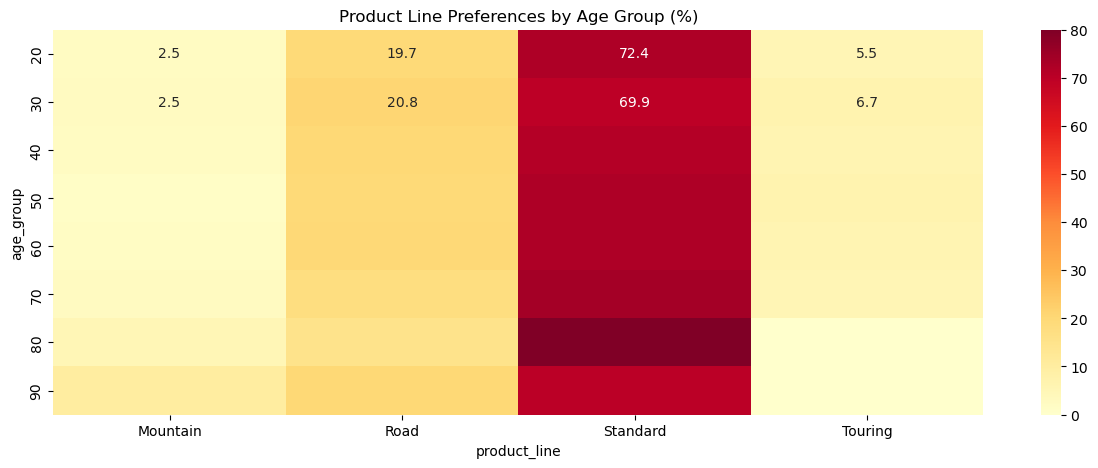

In [16]:
# Age Group Preferences
age_product_preference = df.groupby(['age_group', 'product_line'],observed = False)['transaction_id'].count().unstack()
age_product_preference_pct = age_product_preference.div(age_product_preference.sum(axis=1), axis=0) * 100
plt.figure(figsize=(15, 5))
sns.heatmap(age_product_preference_pct, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Product Line Preferences by Age Group (%)')
plt.show()

**Key Observations:**  

**Standard Bikes:- The most versatile option, appealing to a wide range of customers.**  
**Road Bikes:- A balanced choice for both younger and older riders interested in speed and performance.**  
**Touring Bikes:- Ideal for long-distance cycling and adventure, particularly popular among older age groups.**  
**Mountain Bikes:- Suitable for off-road activities and popular among younger riders seeking excitement.**  


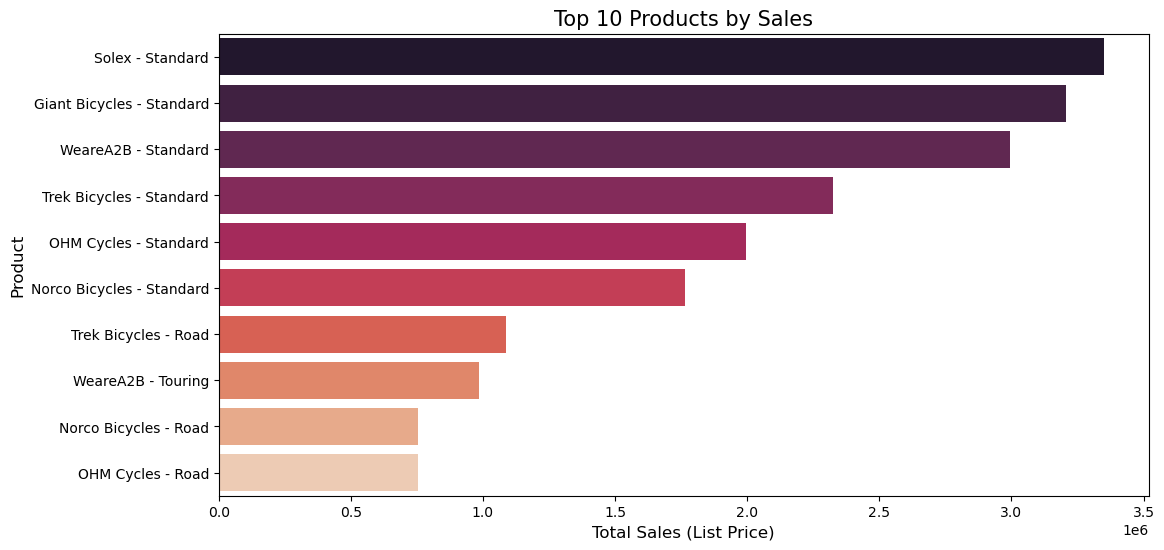

In [17]:
#top 10 products overall
top_10_products_by_sales = df.groupby(['brand', 'product_line'])['list_price'].sum().round(2).reset_index()
top_10_products_by_sales['product'] = top_10_products_by_sales['brand'] + ' - ' + top_10_products_by_sales['product_line']
top_10_products_by_sales = top_10_products_by_sales.sort_values('list_price', ascending=False).head(10)

# Plotting the top 10 products by sales
plt.figure(figsize=(12, 6))
sns.color_palette("rocket", as_cmap=True)
sns.barplot(x='list_price', y='product', data=top_10_products_by_sales, palette="rocket")
plt.xlabel('Total Sales (List Price)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.title('Top 10 Products by Sales', fontsize=15)
plt.show()


**Top 10 products by sales are dominated by Standard and Road class bicycles.**

In [18]:
top_10_products_by_age = df.groupby(['brand', 'product_line']).agg({'list_price': 'sum',
    'age_group': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'job_industry_category': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'wealth_segment' : lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'property_valuation':lambda x: x.mode().iloc[0] if not x.mode().empty else None
})

top_10_products_by_age = top_10_products_by_age.sort_values('list_price', ascending=False).head(10)

top_10_products_by_age

,,list_price,age_group,job_industry_category,wealth_segment,property_valuation
brand,product_line,,,,,
Solex,Standard,3352159.89,40,Manufacturing,Mass Customer,9.0
Giant Bicycles,Standard,3205544.53,40,Manufacturing,Mass Customer,8.0
WeareA2B,Standard,2994251.41,40,Financial Services,Mass Customer,9.0
Trek Bicycles,Standard,2323556.38,40,Financial Services,Mass Customer,8.0
OHM Cycles,Standard,1994426.19,40,Financial Services,Mass Customer,8.0
Norco Bicycles,Standard,1765005.56,40,Financial Services,Mass Customer,8.0
Trek Bicycles,Road,1087811.26,40,Manufacturing,Mass Customer,9.0
WeareA2B,Touring,984705.74,40,Financial Services,Mass Customer,8.0
Norco Bicycles,Road,754687.57,40,Manufacturing,Mass Customer,8.0


In [19]:
df.to_csv("RFM_FINAL_DSET", index = False)

**This table provide significant insight into the type of customers and most selling products which can help us formulate marketing strategies**

# Solution

The company can increase profitability by targeting its high-value (**Platinum** and **Gold**) customer segments and optimizing its product offerings.

---

## Reasons

1. **High-value customers** (Platinum and Gold) generate the most profit for the company.
2. The analysis revealed key insights about the **preferences and behaviors** of these high-value customers, which can be leveraged to drive profitability.
3. Certain **product lines, brands, and features** have higher profit margins, indicating opportunities for optimization.

---

## Facts

1. **Gold customers** account for the highest total profit, followed closely by **Platinum customers**.
2. **High-value customers** prefer **Solex**, **WeareA2B**, and **Giant Bicycle** brands, which have relatively higher profit margins.
3. **Standard**, **Road**, and **Touring** product lines are the most profitable, with **Touring bicycles** having the highest profit margins.
4. **Customers in their 40s**, working in **Manufacturing** or **Financial Services**, and belonging to the **Mass Customer** wealth segment are the primary buyers of the top-selling products.
5. A **balanced approach to online and offline sales channels**, as well as **targeted marketing campaigns** based on customer demographics and preferences, can help increase profitability.
y.fitability.

# Profitable Growth Strategies for an Australian Bicycle Company:  
## An RFM Analysis and Segmentation Study

This project aimed to increase profitability for an Australian bicycle company by identifying and targeting high-value customers through **RFM (Recency, Frequency, Monetary) analysis** and customer segmentation. Here are the key findings and insights:

---

### Customer Segmentation

Four customer segments were identified using **K-means clustering**:

- **Platinum**
- **Gold**
- **Silver**
- **Bronze**

**Gold customers** generate the most profit, followed closely by **Platinum customers**, indicating these are the high-value segments to focus on.

---

### High-Value Customer Analysis (Platinum and Gold)

- **Online vs. Offline Orders**: Nearly even split, suggesting a need for a balanced approach to both channels.
- **Product Size**: Medium-sized products are most popular (64-66%), followed by large, then small.
- **Geographic Distribution**: 
  - **NSW** dominates (53-54%), followed by **VIC** and **QLD**.
- **Gender**: Near-even split between male and female customers, slightly favoring females.
- **Job Industries**: Financial Services and Manufacturing are top industries for both segments.
- **Wealth Segment**: Mass Customer segment dominates in both Platinum and Gold categories.

---

### Brand and Product Analysis

- **Brand Preference**: Solex, WeareA2B, and Giant Bicycles are preferred by high-value customers.
- **Profitability**: WeareA2B generates the most profit despite not being the most popular, due to higher profit margins.
- **Product Lines**: Standard, Road, and Touring product lines are the most profitable.

#### Age Group Preferences:
- **Standard Bikes**: Appeal to a wide range of customers.
- **Road Bikes**: Popular among both younger and older riders.
- **Touring Bikes**: Particularly popular among older age groups.
- **Mountain Bikes**: Popular among younger riders.

---

### Top Products

The top 10 products by sales are dominated by **Standard** and **Road class bicycles**. 

The most popular products are primarily purchased by customers in their 40s, working in **Manufacturing** or **Financial Services**, belonging to the **Mass Customer** wealth segment.

---

## Recommendations

1. **Focus marketing efforts** on Solex, WeareA2B, and Giant Bicycle brands, especially for **Platinum** and **Gold customers**.
2. **Emphasize Standard and Road bicycles** in product offerings and marketing campaigns.
3. **Develop targeted marketing strategies** for **NSW**, **VIC**, and **QLD**.
4. Implement **gender-neutral marketing approaches**.
5. Create tailored promotions for customers in **Financial Services** and **Manufacturing industries**.
6. Consider expanding the **Touring bicycle line**, given its high profit margins.
7. **Develop age-specific marketing campaigns** for different product lines.
8. Maintain a **balanced approach to online and offline sales channels**.

---

By implementing these insights and recommendations, the company can better target high-value customers, optimize its product offerings, and ultimately increase profitability.
